In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [94]:
dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [95]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [96]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

X_train.shape

(1199, 60)

In [97]:
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    SimpleRNN(50),
    Dense(1)
])


In [98]:
print("Name: YUVARAJ.S\nRegister Number: 212222240119")
model.summary()

Name: YUVARAJ.S
Register Number: 212222240119
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, 60, 50)            2600      
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [100]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 17ms/step - loss: 0.0982 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0226 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0177 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0074 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0050 - accuracy: 8.3403e-04
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0038 - accuracy: 8.3403e-04
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0040 - accuracy: 8.3403e-04
Epoch 8/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0019 - accuracy: 8.3403e-04
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0019 - accuracy: 8.3403e-04
Epoch 10/100
38/38 [==============================] - 1s 15ms/st

In [101]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [102]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [103]:
X_test.shape
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 1s 7ms/step


Name: YUVARAJ.S
Register Number: 212222240119


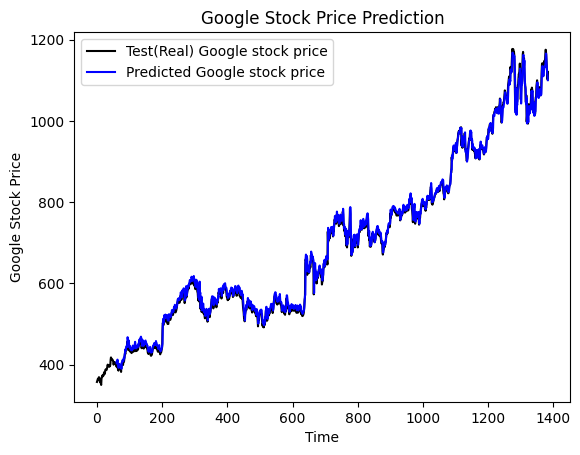

In [111]:
print("Name: YUVARAJ.S\nRegister Number: 212222240119")
plt.plot(np.arange(0,1384),inputs, color='black', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Name: YUVARAJ.S
Register Number: 212222240119


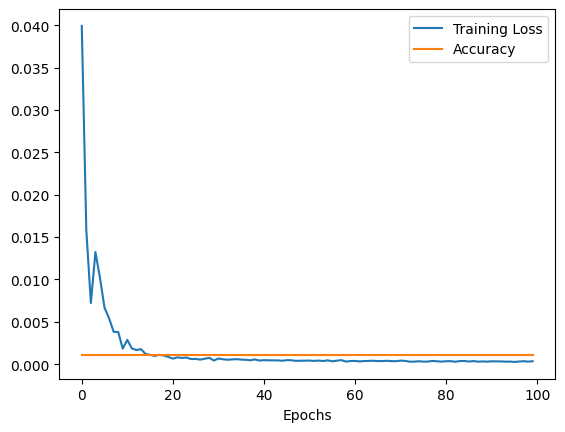

In [110]:
print("Name: YUVARAJ.S\nRegister Number: 212222240119")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()